In [66]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
# datascience version number of last run of this notebook
version.__version__

'0.10.1'

In [67]:
import urllib.request as urlreq
import re

max_enroller = re.compile('"maxEnroll":[0123456789]*,')
enroller = re.compile('"enrolledCount":[0123456789]*,')
wait_lister = re.compile('"waitlistedCount":[0123456789]*,')
def current_enrollment(schedule_url):
    rdr = urlreq.urlopen(schedule_url)
    page = rdr.read(100000).decode('utf-8')
    max_enroll = int(max_enroller.search(page).group()[12:-1])
    enrolled = int(enroller.search(page).group()[16:-1])
    waitlisted = int(wait_lister.search(page).group()[18:-1])
    return max_enroll, enrolled, waitlisted

def lookup_row(row):
    course, kind, url = row
    # print(url)
    limit, enroll, wait = current_enrollment(url)
    return (course, kind, enroll+wait, limit, enroll, wait)

def lookup_courses(watch):
    return Table(["Course", "Kind", "Registered", "Limit", "Enrolled", "Waitlisted"]).with_rows(
        [lookup_row(row) for row in watch.rows])

In [68]:
url_watch = Table(["Course", "Kind", "URL"]).with_rows([
    ("Data8","Foundation","http://classes.berkeley.edu/content/2018-spring-stat-c8-001-lec-001"),
    ("DS100","Gateway","http://classes.berkeley.edu/content/2018-spring-compsci-c100-001-lec-001"),
    ("stat88","Connector","http://classes.berkeley.edu/content/2018-spring-stat-88-001-lec-001"),
    ("CEE88b","Connector","http://classes.berkeley.edu/content/2018-spring-civeng-88b-001-lec-001"),
    ("CS88","Connector","http://classes.berkeley.edu/content/2018-spring-compsci-88-001-lec-001"),
    ("Geog88", "Connector", "http://classes.berkeley.edu/content/2018-spring-geog-88-001-lec-001"),
    ("LegalSt88", "Connector", "http://classes.berkeley.edu/content/2018-spring-legalst-88-001-sem-001"),
    ("MCELLBI88", "Connector", "http://classes.berkeley.edu/content/2018-spring-mcellbi-88-001-lec-001"),
    ("UGBA 96-4", "Connector", "http://classes.berkeley.edu/content/2018-spring-ugba-96-004-lec-004"),
    ("UGBA 96-5", "Connector", "http://classes.berkeley.edu/content/2018-spring-ugba-96-005-lec-005"),
    ("Stat28", "Adapter", "http://classes.berkeley.edu/content/2018-spring-stat-28-001-lec-001"),
    ("Stat140", "Extend", "http://classes.berkeley.edu/content/2018-spring-stat-140-001-lec-001"),
    ("COMPSCI 189","Upper","http://classes.berkeley.edu/content/2018-spring-compsci-189-001-lec-001"),
    ("STAT 133","Upper","http://classes.berkeley.edu/content/2018-spring-stat-133-001-lec-001"),
    ("STAT 134", "Upper","http://classes.berkeley.edu/content/2018-spring-stat-134-001-lec-001"),
    ("STAT 154", "Upper","http://classes.berkeley.edu/content/2018-spring-stat-154-001-lec-001"),
    ("CS 61B", "Lower", "http://classes.berkeley.edu/content/2018-spring-compsci-61b-001-lec-001"),
    ("CS 186", "Upper", "http://classes.berkeley.edu/content/2018-spring-compsci-186-001-lec-001"),
    ("CS194-129-DNN", "Upper", "http://classes.berkeley.edu/content/2018-spring-compsci-194-129-lec-129"),
    ("IEOR135", "Upper","http://classes.berkeley.edu/content/2018-spring-indeng-135-001-lec-001"),
    ("INFO 190-1", "Upper", "http://classes.berkeley.edu/content/2018-spring-info-190-001-sem-001"),
    
])
#url_watch.show()
#lookup_courses(url_watch).show()

In [69]:
# Execute this cell to get fetch the current enrollments from schedule
current_enrollments = lookup_courses(url_watch)

In [70]:
current_enrollments.show()

Course,Kind,Registered,Limit,Enrolled,Waitlisted
Data8,Foundation,734,732,622,112
DS100,Gateway,444,600,308,136
stat88,Connector,120,100,100,20
CEE88b,Connector,0,40,0,0
CS88,Connector,100,60,60,40
Geog88,Connector,15,30,15,0
LegalSt88,Connector,26,30,26,0
MCELLBI88,Connector,21,20,20,1
UGBA 96-4,Connector,42,62,41,1
UGBA 96-5,Connector,31,62,31,0


In [71]:
by_group = current_enrollments.group('Kind', collect=sum)
by_group

Kind,Course sum,Registered sum,Limit sum,Enrolled sum,Waitlisted sum
Adapter,,12,60,12,0
Connector,,355,404,293,62
Extend,,139,120,119,20
Foundation,,734,732,622,112
Gateway,,444,600,308,136
Lower,,"1,011",732,617,394
Upper,,"1,596","1,943","1,251",345


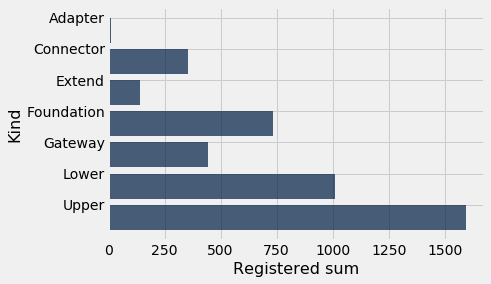

In [72]:
by_group.barh('Kind', 'Registered sum')

In [73]:
sum(by_group['Registered sum'])

4291

In [74]:
connectors = current_enrollments.where('Kind', 'Connector')
connectors

Course,Kind,Registered,Limit,Enrolled,Waitlisted
stat88,Connector,120,100,100,20
CEE88b,Connector,0,40,0,0
CS88,Connector,100,60,60,40
Geog88,Connector,15,30,15,0
LegalSt88,Connector,26,30,26,0
MCELLBI88,Connector,21,20,20,1
UGBA 96-4,Connector,42,62,41,1
UGBA 96-5,Connector,31,62,31,0


In [75]:
sum(connectors['Registered'])

355

In [76]:
sum(connectors['Registered'])/current_enrollments.where('Course', 'Data8')['Registered'][0]

0.48365122615803813

In [77]:
sum(current_enrollments.where('Kind', 'Extend')['Registered'])

139

In [78]:
current_enrollments.where(np.in1d(current_enrollments['Course'], 
                                  ['STAT 154', 'COMPSCI 189', 'INDENG 142']))

Course,Kind,Registered,Limit,Enrolled,Waitlisted
COMPSCI 189,Upper,469,400,280,189
STAT 154,Upper,86,70,70,16


In [79]:
current_enrollments.where(np.in1d(current_enrollments['Course'], 
                                  ['STAT 154', 'COMPSCI 189', 'INDENG 142'])).stats()

statistic,Course,Kind,Registered,Limit,Enrolled,Waitlisted
min,COMPSCI 189,Upper,86,70,70,16
max,STAT 154,Upper,469,400,280,189
median,,,277.5,235,175,102.5
sum,,,555,470,350,205
